# Kasra Samadi 993623030 
# HW4 DataMining
# KNN

## Tasks : 
### 1- Downloading Iris Data Set
### 2- Obtaining information (#Rows, #Columns, Types of Columns, Missing values)
### 3- Pre-processing
### 4- KNN
### 5- Evaluation and Confusion matrix


# Task 1 
### Downloading Iris Train and Iris Test

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing

## Reading Iris_train.csv and Iris_test.csv

In [2]:
df_train = pd.read_csv("Iris_train.csv")
df_test = pd.read_csv("Iris_test.csv")

In [3]:
df_train.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,85,5.4,3.0,4.5,1.5,Iris-versicolor
1,123,7.7,2.8,6.7,2.0,Iris-virginica
2,29,5.2,3.4,1.4,0.2,Iris-setosa
3,25,4.8,3.4,1.9,0.2,Iris-setosa
4,76,6.6,3.0,4.4,1.4,Iris-versicolor


# Task 2
### Obtaining information

In [4]:
df_train.shape

(120, 6)

In [5]:
df_test.shape

(30, 6)

## Find columns names and their types

In [6]:
df_train.dtypes

Id                 int64
SepalLengthCm    float64
SepalWidthCm     float64
PetalLengthCm    float64
PetalWidthCm     float64
Species           object
dtype: object

## Check Missing values

In [7]:
df_train.isna().sum() , df_train.isna().sum()

(Id               0
 SepalLengthCm    0
 SepalWidthCm     0
 PetalLengthCm    0
 PetalWidthCm     0
 Species          0
 dtype: int64,
 Id               0
 SepalLengthCm    0
 SepalWidthCm     0
 PetalLengthCm    0
 PetalWidthCm     0
 Species          0
 dtype: int64)

# Task 3 
### Pre-processing

#### X as the Feature Matrix 
####  y as the response vector (target)

In [8]:
X_train = df_train[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']] .values
X_train[0:5]

array([[5.4, 3. , 4.5, 1.5],
       [7.7, 2.8, 6.7, 2. ],
       [5.2, 3.4, 1.4, 0.2],
       [4.8, 3.4, 1.9, 0.2],
       [6.6, 3. , 4.4, 1.4]])

In [9]:
y_train = df_train['Species'].values
y_train[0:5]

array(['Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor'], dtype=object)

In [10]:
X_test = df_test[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm', 'PetalWidthCm']] .values
X_test[0:5]

array([[4.9, 3. , 1.4, 0.2],
       [5. , 3.4, 1.5, 0.2],
       [5.8, 4. , 1.2, 0.2],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.3, 1.7, 0.5]])

In [11]:
y_test = df_test['Species'].values
y_test[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### Normalize Data

In [12]:
X_train = preprocessing.StandardScaler().fit(X_train).transform(X_train.astype(float))
X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test.astype(float))
X_train[0:5]

array([[-0.48444978, -0.11986112,  0.45640414,  0.44097878],
       [ 2.27811507, -0.5693403 ,  1.69857623,  1.09107034],
       [-0.72467281,  0.77909726, -1.29392926, -1.24925929],
       [-1.20511887,  0.77909726, -1.01161742, -1.24925929],
       [ 0.9568884 , -0.11986112,  0.39994177,  0.31096046]])

# Task 4
### KNN

#### Modeling
Classifier implementing the k-nearest neighbors vote

In [13]:
from sklearn.neighbors import KNeighborsClassifier
k = 5
#Train Model
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier()

#### Prediction


In [14]:
y_pred = neigh.predict(X_test)
y_pred[0:5]

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

# Task 5 
#### Evaluation and Confusion matrix

In [15]:
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
print("KNN's Accuracy:", accuracy_score(y_test, y_pred))
print("KNN's F1 score:", f1_score(y_test, y_pred, average='weighted'))
print("KNN's Recall score: ", recall_score(y_test, y_pred, average='weighted'))
print("KNN's Precision score: ", precision_score(y_test, y_pred, average='weighted'))

KNN's Accuracy: 0.8666666666666667
KNN's F1 score: 0.8644444444444445
KNN's Recall score:  0.8666666666666667
KNN's Precision score:  0.9047619047619048


#### Confusion matrix

<AxesSubplot:>

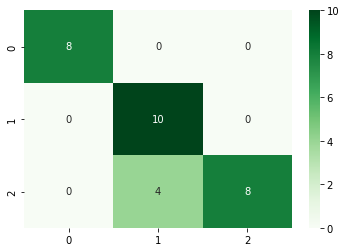

In [16]:
con_matrix=confusion_matrix(y_test, y_pred)
sns.heatmap(con_matrix,annot=True, cmap="Greens")